In [31]:
import matplotlib.pyplot as plt
from sunpy.coordinates import frames
from astropy.coordinates import SkyCoord
from astropy.time import Time
import pandas as pd
from sunpy.coordinates import get_horizons_coord
import astrospice
from astropy import units as u
import numpy as np
from stixdcpy.net import JSONRequest as jreq
from matplotlib import dates

## Query the flare lists from the datacenter

In [163]:
flares=jreq.fetch_flare_list('2021-01-01T00:00:00', '2021-12-31T00:00:00')#, sort='goes')
flares2=jreq.fetch_flare_list('2022-01-01T00:00:00', '2022-06-01T00:00:00')#, sort='goes')

In [164]:
df1 = pd.DataFrame(flares)
df2 = pd.DataFrame(flares2)

In [165]:
stix_flares = pd.concat([df1, df2])

## Plotting the x and y coords - all over the place mainly as HPC is observer dependent and STIX is flying all over the place

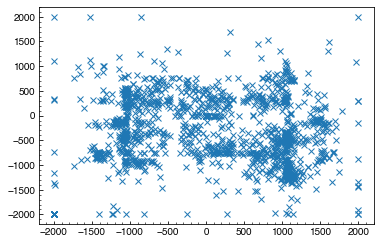

In [166]:
plt.plot(stix_flares["CFL_X_arcsec"], stix_flares["CFL_Y_arcsec"], 
         marker='x', ls='')

sort flare list by start date (if not already)

In [167]:
stix_flares.sort_values(by="start_UTC", inplace=True)

In [168]:
len(stix_flares)

6669

In [170]:
stix_flares.tail(3)

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec
2,2205312303,392,2022-05-31T23:03:56.059,247.0,7685,B2.1,2.100182e-07,None,None,2022-05-31T22:59:28.059,2022-05-31T23:06:00.059,367
1,2205312325,240,2022-05-31T23:25:36.061,247.0,7686,B2.7,2.743545e-07,None,None,2022-05-31T23:24:12.061,2022-05-31T23:28:12.062,303
0,2205312352,1836,2022-05-31T23:52:36.064,247.0,7687,B3.3,3.333161e-07,None,None,2022-05-31T23:33:48.062,2022-06-01T00:12:12.666,7935


# get STIX flares with CFL values

In [142]:
stix_flares2 = stix_flares[~stix_flares["CFL_X_arcsec"].isnull()]

In [143]:
stix_flares2.head()

,flare_id,duration,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,start_UTC,end_UTC,LC0_peak_counts_4sec
3048,2101010439,380,2021-01-01T04:39:50.116,247.0,284,B2.1,2.118954e-07,0.0,0.0,2021-01-01T04:38:38.116,2021-01-01T04:44:58.116,463
3046,2101061410,228,2021-01-06T14:10:46.745,247.0,286,A,1.325816e-08,-2000.0,-2000.0,2021-01-06T14:09:38.745,2021-01-06T14:13:26.745,671
3044,2101090601,2884,2021-01-09T06:01:22.804,247.0,288,A,1.780953e-08,0.0,0.0,2021-01-09T05:32:30.802,2021-01-09T06:20:34.806,335
3042,2101101833,980,2021-01-10T18:33:22.715,247.0,290,A,1.207068e-08,-2000.0,-2000.0,2021-01-10T18:27:06.714,2021-01-10T18:43:26.716,367
3041,2101121818,752,2021-01-12T18:18:42.679,247.0,291,A,2.439015e-09,-2000.0,-2000.0,2021-01-12T18:15:38.678,2021-01-12T18:28:10.679,367


In [144]:
len(stix_flares2)

2002

In [145]:
times = Time(pd.to_datetime(stix_flares2["start_UTC"]))

In [146]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/Users/laura.hayes/opt/miniconda3/envs/stix_directivity/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [147]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", times)

In [180]:
solo_coords[10]

<SkyCoord (HeliographicStonyhurst: obstime=2021-01-28T02:26:21.751000000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, km)
    (163.91862102, -0.25243225, 78706157.34319572)>

In [174]:
solo_coords[0]

<SkyCoord (HeliographicStonyhurst: obstime=2021-01-01T04:38:38.116000000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, km)
    (131.67346449, -1.85008244, 1.03677026e+08)>

In [148]:
coord1 = SkyCoord(stix_flares2["CFL_X_arcsec"]*u.arcsec,  stix_flares2["CFL_Y_arcsec"]*u.arcsec, 
                  observer=solo_coords, frame=frames.Helioprojective)

In [149]:
frames_earth = frames.Helioprojective(observer="earth", obstime=times)

In [150]:
coords_hgs = coord1.transform_to(frames.HeliographicStonyhurst)

In [151]:
coords_hgs

<SkyCoord (HeliographicStonyhurst: obstime=['2021-01-01T04:38:38.116000000' '2021-01-06T14:09:38.745000000'
 '2021-01-09T05:32:30.802000000' ... '2021-12-06T07:22:39.824000000'
 '2021-12-06T07:47:43.826000000' '2021-12-06T13:55:23.864000000'], rsun=695700.0 km): (lon, lat, radius) in (deg, deg, km)
    [(131.67346449,  -1.85008244, 695700.        ),
     (         nan,          nan,             nan),
     (137.94817972,  -1.59433478, 695700.        ), ...,
     (-49.34753983, -33.08876369, 695700.00000501),
     (-46.28678786, -33.05007287, 695700.00000107),
     ( -2.9711156 ,   0.89676619, 695700.        )]>

In [181]:
coord_earth = coord1.transform_to(frames_earth)

In [182]:
np.sum(np.isnan(coord_earth.Tx.value))

498

In [183]:
np.sum(np.isnan(coord1.Tx.value))

0

In [184]:
times[0]

<Time object: scale='utc' format='datetime64' value=2021-01-01T04:38:38.116000000>

In [185]:
dt = [(times[i].datetime-times[0].datetime).total_seconds() for i in range(len(times))]

In [186]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", times).heliographic_stonyhurst
earth_coords = astrospice.generate_coords("earth", times).heliographic_stonyhurst
sun_coords = astrospice.generate_coords("sun", times).heliographic_stonyhurst

In [187]:
ticks = dates.date2num(times.datetime)

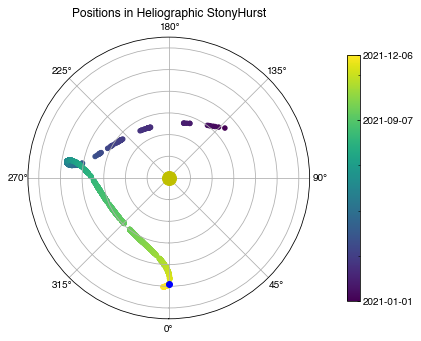

In [188]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='polar')

im = ax.scatter(solo_coords_hgs.lon.to(u.rad), 
           solo_coords_hgs.radius.to(u.au), c=ticks, s=20)

ax.plot(earth_coords_hgs[0].lon.to(u.rad), 
           earth_coords_hgs[0].radius.to(u.au), ms=12, marker='.', color="blue", label="Earth")

ax.plot(sun_coords_hgs[0].lon.to(u.rad), 
        sun_coords_hgs[0].radius.to(u.AU), marker='o', color='y', label="Sun",  ms=14)



ax.set_theta_zero_location("S")
_ = ax.set_yticklabels([])

ax.set_rlim(0, 1.3)
ax.set_title("Positions in Heliographic StonyHurst")

cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.6)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar
#ax.legend()
plt.tight_layout()

[Text(1, 18628.193496712964, '2021-01-01'),
 Text(1, 18877.438584606483, '2021-09-07'),
 Text(1, 18967.580137314817, '2021-12-06')]

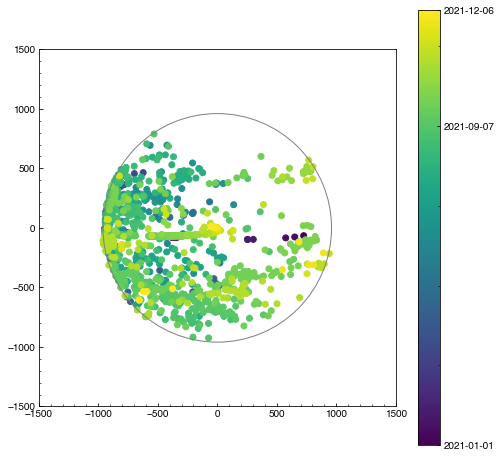

In [189]:
fig, ax = plt.subplots(figsize=(8, 8))
im = plt.scatter(coord_earth.Tx, coord_earth.Ty, c=ticks)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1500, 1500)
ax.set_ylim(-1500, 1500)
circle1 = plt.Circle((0, 0), 960, color='grey', fill=False)
ax.add_artist(circle1)
cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], )
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar

In [190]:
get_horizons_coord("solo", "2022-03-30")

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


<SkyCoord (HeliographicStonyhurst: obstime=2022-03-30T00:00:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (91.74058012, 1.30847464, 0.33146424)>